In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
pip install qiskit qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.8 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer


In [ ]:
!pip install qiskit
!pip install qiskit-aer


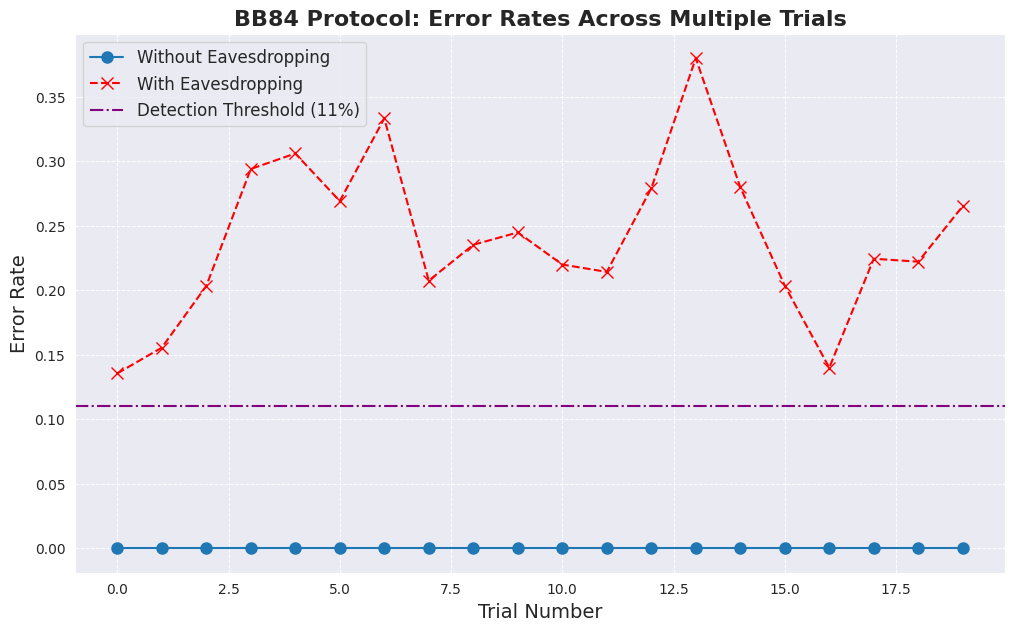


Eavesdropping detected in 20 out of 20 trials.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import json
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit import assemble

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define bases and bits
bases = ['+', 'x']
bits = [0, 1]

def generate_key(length):
    """Generate a random quantum key and measurement bases."""
    return np.random.choice(bits, length).tolist(), np.random.choice(bases, length).tolist()

def measure_photon(photon, alice_basis, bob_basis):
    """Simulate photon measurement based on Alice and Bob's bases."""
    return int(photon if alice_basis == bob_basis else np.random.choice(bits))

def eavesdrop(photon, alice_basis):
    """Simulate an eavesdropper intercepting and measuring the photon."""
    eve_basis = np.random.choice(bases)
    eve_bit = measure_photon(photon, alice_basis, eve_basis)
    return measure_photon(eve_bit, eve_basis, alice_basis)

def bb84_simulation(length=100, eavesdropping=False):
    """Simulate the BB84 key exchange protocol with optional eavesdropping."""
    alice_bits, alice_bases = generate_key(length)
    intercepted_photons = [eavesdrop(bit, basis) if eavesdropping else bit for bit, basis in zip(alice_bits, alice_bases)]
    bob_bases = np.random.choice(bases, length).tolist()
    bob_bits = [measure_photon(p, a, b) for p, a, b in zip(intercepted_photons, alice_bases, bob_bases)]
    sifted_indices = [i for i in range(length) if alice_bases[i] == bob_bases[i]]
    return [int(alice_bits[i]) for i in sifted_indices], [int(bob_bits[i]) for i in sifted_indices]

def calculate_error_rate(alice_key, bob_key):
    """Calculate the error rate between Alice and Bob's keys."""
    return sum(a != b for a, b in zip(alice_key, bob_key)) / len(alice_key) if alice_key else 0

def save_results(results, filename="bb84_results.json"):
    """Save experiment results to a JSON file."""
    with open(filename, "w") as f:
        json.dump(results, f, indent=4)
    logging.info(f"Results saved to {filename}")

def run_trials(trials=20, length=100, threshold=0.11):
    """Run multiple trials of BB84 with and without eavesdropping and visualize results."""
    errors_no_eaves, errors_with_eaves = [], []

    for _ in range(trials):
        errors_no_eaves.append(float(calculate_error_rate(*bb84_simulation(length, eavesdropping=False))))
        errors_with_eaves.append(float(calculate_error_rate(*bb84_simulation(length, eavesdropping=True))))

    plt.figure(figsize=(12, 7))
    sns.set_style("darkgrid")
    plt.plot(errors_no_eaves, label='Without Eavesdropping', marker='o', linestyle='-', markersize=8)
    plt.plot(errors_with_eaves, label='With Eavesdropping', marker='x', linestyle='--', markersize=8, color='red')
    plt.axhline(y=threshold, color='purple', linestyle='-.', label='Detection Threshold (11%)')
    plt.xlabel('Trial Number', fontsize=14)
    plt.ylabel('Error Rate', fontsize=14)
    plt.title('BB84 Protocol: Error Rates Across Multiple Trials', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

    detections = sum(err > threshold for err in errors_with_eaves)
    results = {
        "trials": trials,
        "threshold": threshold,
        "detections": int(detections),
        "error_rates_without_eavesdropping": errors_no_eaves,
        "error_rates_with_eavesdropping": errors_with_eaves,
    }

    save_results(results)
    print(f"\nEavesdropping detected in {detections} out of {trials} trials.")

if __name__ == "__main__":
    run_trials()


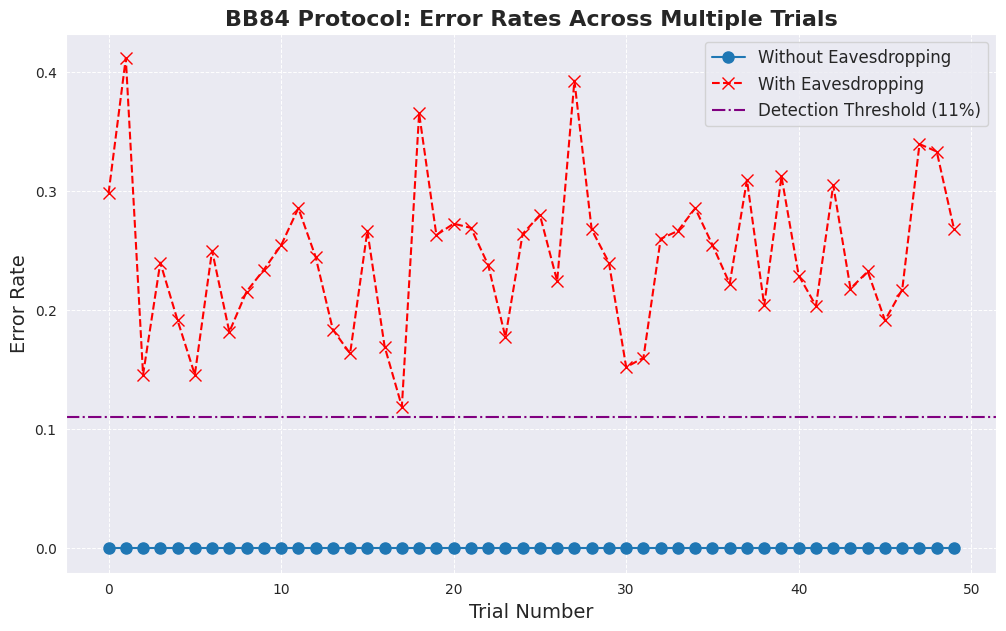


Eavesdropping detected in 50 out of 50 trials.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import json
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit import assemble

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define bases and bits
bases = ['+', 'x']
bits = [0, 1]

def generate_key(length):
    """Generate a random quantum key and measurement bases."""
    return np.random.choice(bits, length).tolist(), np.random.choice(bases, length).tolist()

def measure_photon(photon, alice_basis, bob_basis):
    """Simulate photon measurement based on Alice and Bob's bases."""
    return int(photon if alice_basis == bob_basis else np.random.choice(bits))

def eavesdrop(photon, alice_basis):
    """Simulate an eavesdropper intercepting and measuring the photon."""
    eve_basis = np.random.choice(bases)
    eve_bit = measure_photon(photon, alice_basis, eve_basis)
    return measure_photon(eve_bit, eve_basis, alice_basis)

def bb84_simulation(length=100, eavesdropping=False):
    """Simulate the BB84 key exchange protocol with optional eavesdropping."""
    alice_bits, alice_bases = generate_key(length)
    intercepted_photons = [eavesdrop(bit, basis) if eavesdropping else bit for bit, basis in zip(alice_bits, alice_bases)]
    bob_bases = np.random.choice(bases, length).tolist()
    bob_bits = [measure_photon(p, a, b) for p, a, b in zip(intercepted_photons, alice_bases, bob_bases)]
    sifted_indices = [i for i in range(length) if alice_bases[i] == bob_bases[i]]
    return [int(alice_bits[i]) for i in sifted_indices], [int(bob_bits[i]) for i in sifted_indices]

def calculate_error_rate(alice_key, bob_key):
    """Calculate the error rate between Alice and Bob's keys."""
    return sum(a != b for a, b in zip(alice_key, bob_key)) / len(alice_key) if alice_key else 0

def save_results(results, filename="bb84_results.json"):
    """Save experiment results to a JSON file."""
    with open(filename, "w") as f:
        json.dump(results, f, indent=4)
    logging.info(f"Results saved to {filename}")

def run_trials(trials=50, length=100, threshold=0.11):
    """Run multiple trials of BB84 with and without eavesdropping and visualize results."""
    errors_no_eaves, errors_with_eaves = [], []

    for _ in range(trials):
        errors_no_eaves.append(float(calculate_error_rate(*bb84_simulation(length, eavesdropping=False))))
        errors_with_eaves.append(float(calculate_error_rate(*bb84_simulation(length, eavesdropping=True))))

    plt.figure(figsize=(12, 7))
    sns.set_style("darkgrid")
    plt.plot(errors_no_eaves, label='Without Eavesdropping', marker='o', linestyle='-', markersize=8)
    plt.plot(errors_with_eaves, label='With Eavesdropping', marker='x', linestyle='--', markersize=8, color='red')
    plt.axhline(y=threshold, color='purple', linestyle='-.', label='Detection Threshold (11%)')
    plt.xlabel('Trial Number', fontsize=14)
    plt.ylabel('Error Rate', fontsize=14)
    plt.title('BB84 Protocol: Error Rates Across Multiple Trials', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

    detections = sum(err > threshold for err in errors_with_eaves)
    results = {
        "trials": trials,
        "threshold": threshold,
        "detections": int(detections),
        "error_rates_without_eavesdropping": errors_no_eaves,
        "error_rates_with_eavesdropping": errors_with_eaves,
    }

    save_results(results)
    print(f"\nEavesdropping detected in {detections} out of {trials} trials.")

if __name__ == "__main__":
    run_trials()


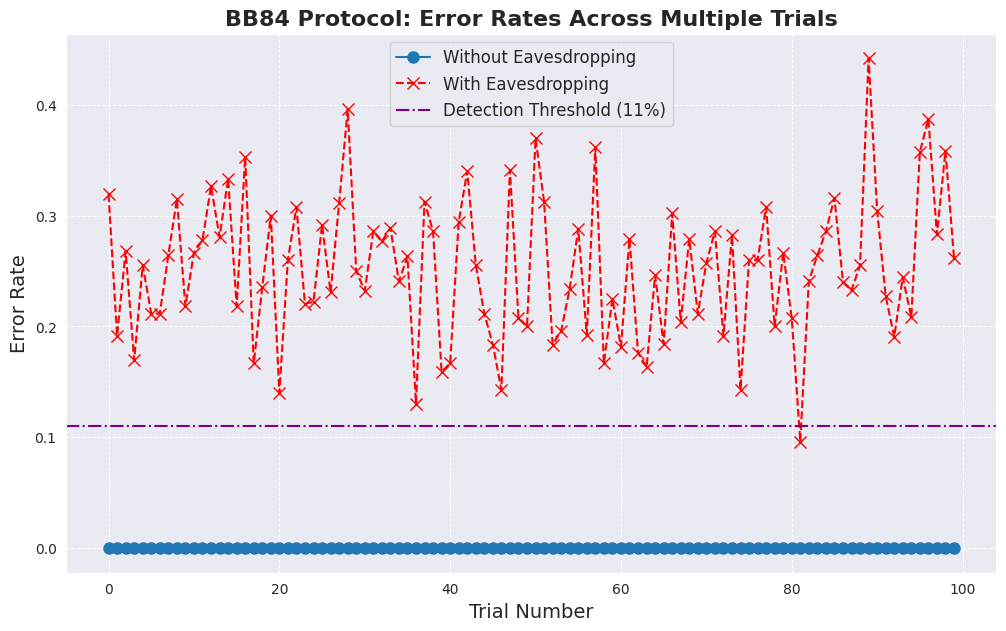


Eavesdropping detected in 99 out of 100 trials.
Trials below threshold: 1 out of 100.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import json
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit import assemble

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define bases and bits
bases = ['+', 'x']
bits = [0, 1]

def generate_key(length):
    """Generate a random quantum key and measurement bases."""
    return np.random.choice(bits, length).tolist(), np.random.choice(bases, length).tolist()

def measure_photon(photon, alice_basis, bob_basis):
    """Simulate photon measurement based on Alice and Bob's bases."""
    return int(photon if alice_basis == bob_basis else np.random.choice(bits))

def eavesdrop(photon, alice_basis):
    """Simulate an eavesdropper intercepting and measuring the photon."""
    eve_basis = np.random.choice(bases)
    eve_bit = measure_photon(photon, alice_basis, eve_basis)
    return measure_photon(eve_bit, eve_basis, alice_basis)

def bb84_simulation(length=100, eavesdropping=False):
    """Simulate the BB84 key exchange protocol with optional eavesdropping."""
    alice_bits, alice_bases = generate_key(length)
    intercepted_photons = [eavesdrop(bit, basis) if eavesdropping else bit for bit, basis in zip(alice_bits, alice_bases)]
    bob_bases = np.random.choice(bases, length).tolist()
    bob_bits = [measure_photon(p, a, b) for p, a, b in zip(intercepted_photons, alice_bases, bob_bases)]
    sifted_indices = [i for i in range(length) if alice_bases[i] == bob_bases[i]]
    return [int(alice_bits[i]) for i in sifted_indices], [int(bob_bits[i]) for i in sifted_indices]

def calculate_error_rate(alice_key, bob_key):
    """Calculate the error rate between Alice and Bob's keys."""
    return sum(a != b for a, b in zip(alice_key, bob_key)) / len(alice_key) if alice_key else 0

def save_results(results, filename="bb84_results.json"):
    """Save experiment results to a JSON file."""
    with open(filename, "w") as f:
        json.dump(results, f, indent=4)
    logging.info(f"Results saved to {filename}")

def run_trials(trials=100, length=100, threshold=0.11):
    """Run multiple trials of BB84 with and without eavesdropping and visualize results."""
    errors_no_eaves, errors_with_eaves = [], []

    for _ in range(trials):
        error_rate_no_eaves = float(calculate_error_rate(*bb84_simulation(length, eavesdropping=False)))
        error_rate_with_eaves = float(calculate_error_rate(*bb84_simulation(length, eavesdropping=True)))

        errors_no_eaves.append(error_rate_no_eaves)
        errors_with_eaves.append(error_rate_with_eaves)

    plt.figure(figsize=(12, 7))
    sns.set_style("darkgrid")
    plt.plot(errors_no_eaves, label='Without Eavesdropping', marker='o', linestyle='-', markersize=8)
    plt.plot(errors_with_eaves, label='With Eavesdropping', marker='x', linestyle='--', markersize=8, color='red')
    plt.axhline(y=threshold, color='purple', linestyle='-.', label='Detection Threshold (11%)')
    plt.xlabel('Trial Number', fontsize=14)
    plt.ylabel('Error Rate', fontsize=14)
    plt.title('BB84 Protocol: Error Rates Across Multiple Trials', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

    detections = sum(err > threshold for err in errors_with_eaves)
    below_threshold = sum(err < threshold for err in errors_with_eaves)
    results = {
        "trials": trials,
        "threshold": threshold,
        "detections": int(detections),
        "below_threshold_trials": int(below_threshold),
        "error_rates_without_eavesdropping": errors_no_eaves,
        "error_rates_with_eavesdropping": errors_with_eaves,
    }

    save_results(results)
    print(f"\nEavesdropping detected in {detections} out of {trials} trials.")
    print(f"Trials below threshold: {below_threshold} out of {trials}.")

if __name__ == "__main__":
    run_trials()


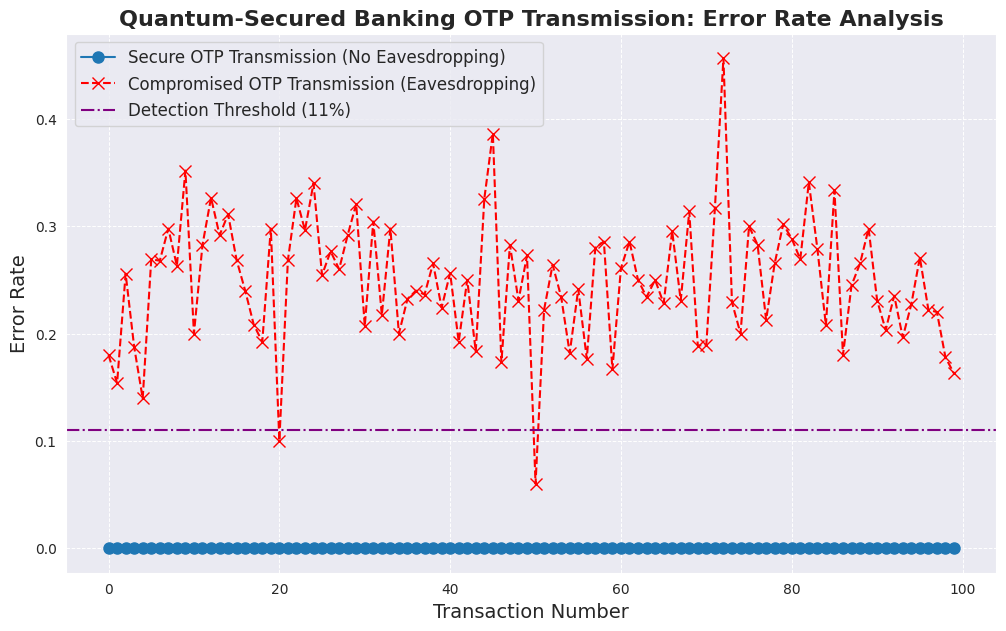


Eavesdropping detected in 98 out of 100 banking transactions.
Transactions below threshold: 2 out of 100.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import json
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit import assemble

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define bases and bits
bases = ['+', 'x']
bits = [0, 1]

def generate_key(length):
    """Generate a random quantum key and measurement bases."""
    return np.random.choice(bits, length).tolist(), np.random.choice(bases, length).tolist()

def measure_photon(photon, alice_basis, bob_basis):
    """Simulate photon measurement based on Alice and Bob's bases."""
    return int(photon if alice_basis == bob_basis else np.random.choice(bits))

def eavesdrop(photon, alice_basis):
    """Simulate an eavesdropper intercepting and measuring the photon."""
    eve_basis = np.random.choice(bases)
    eve_bit = measure_photon(photon, alice_basis, eve_basis)
    return measure_photon(eve_bit, eve_basis, alice_basis)

def bb84_simulation(length=100, eavesdropping=False):
    """Simulate a secure OTP transfer using the BB84 key exchange protocol with optional eavesdropping."""
    alice_bits, alice_bases = generate_key(length)
    intercepted_photons = [eavesdrop(bit, basis) if eavesdropping else bit for bit, basis in zip(alice_bits, alice_bases)]
    bob_bases = np.random.choice(bases, length).tolist()
    bob_bits = [measure_photon(p, a, b) for p, a, b in zip(intercepted_photons, alice_bases, bob_bases)]
    sifted_indices = [i for i in range(length) if alice_bases[i] == bob_bases[i]]
    return [int(alice_bits[i]) for i in sifted_indices], [int(bob_bits[i]) for i in sifted_indices]

def calculate_error_rate(alice_key, bob_key):
    """Calculate the error rate between Alice and Bob's keys."""
    return sum(a != b for a, b in zip(alice_key, bob_key)) / len(alice_key) if alice_key else 0

def save_results(results, filename="bb84_results.json"):
    """Save experiment results to a JSON file."""
    with open(filename, "w") as f:
        json.dump(results, f, indent=4)
    logging.info(f"Results saved to {filename}")

def run_trials(trials=100, length=100, threshold=0.11):
    """Simulate a banking OTP transmission using BB84 protocol and detect eavesdropping attempts."""
    errors_no_eaves, errors_with_eaves = [], []

    for _ in range(trials):
        error_rate_no_eaves = float(calculate_error_rate(*bb84_simulation(length, eavesdropping=False)))
        error_rate_with_eaves = float(calculate_error_rate(*bb84_simulation(length, eavesdropping=True)))

        errors_no_eaves.append(error_rate_no_eaves)
        errors_with_eaves.append(error_rate_with_eaves)

    plt.figure(figsize=(12, 7))
    sns.set_style("darkgrid")
    plt.plot(errors_no_eaves, label='Secure OTP Transmission (No Eavesdropping)', marker='o', linestyle='-', markersize=8)
    plt.plot(errors_with_eaves, label='Compromised OTP Transmission (Eavesdropping)', marker='x', linestyle='--', markersize=8, color='red')
    plt.axhline(y=threshold, color='purple', linestyle='-.', label='Detection Threshold (11%)')
    plt.xlabel('Transaction Number', fontsize=14)
    plt.ylabel('Error Rate', fontsize=14)
    plt.title('Quantum-Secured Banking OTP Transmission: Error Rate Analysis', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

    detections = sum(err > threshold for err in errors_with_eaves)
    below_threshold = sum(err < threshold for err in errors_with_eaves)
    results = {
        "trials": trials,
        "threshold": threshold,
        "detections": int(detections),
        "below_threshold_trials": int(below_threshold),
        "error_rates_without_eavesdropping": errors_no_eaves,
        "error_rates_with_eavesdropping": errors_with_eaves,
    }

    save_results(results)
    print(f"\nEavesdropping detected in {detections} out of {trials} banking transactions.")
    print(f"Transactions below threshold: {below_threshold} out of {trials}.")

if __name__ == "__main__":
    run_trials()


Enter the message to send: Hello Bob


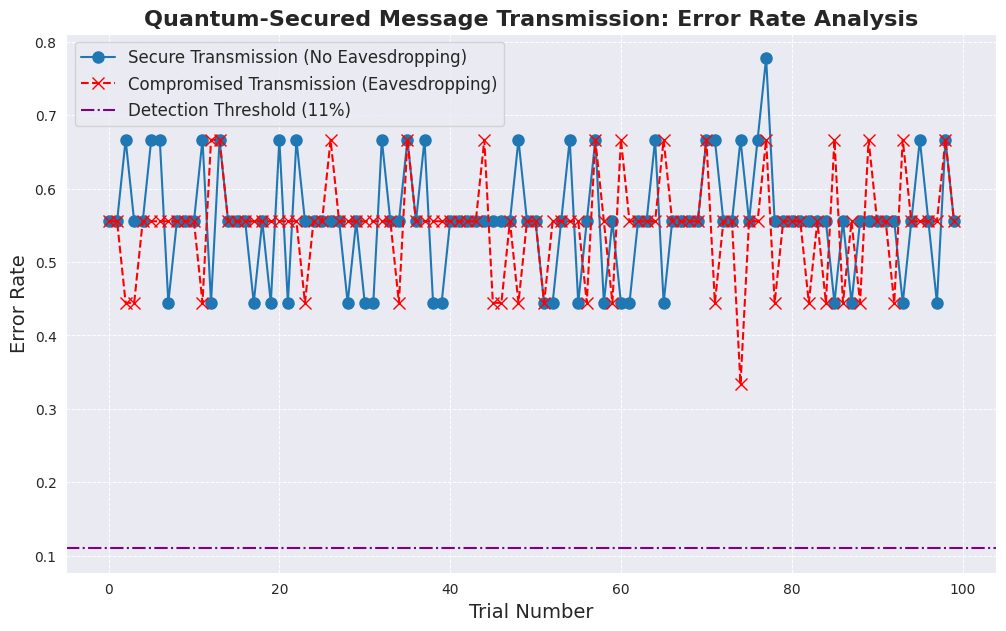


Eavesdropping detected in 100 out of 100 trials.
Trials below threshold: 0 out of 100.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import json
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit import assemble

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define bases and bits
bases = ['+', 'x']
bits = [0, 1]

def text_to_binary(text):
    """Convert text message to binary representation."""
    return ''.join(format(ord(char), '08b') for char in text)

def binary_to_text(binary):
    """Convert binary string back to text message."""
    chars = [binary[i:i+8] for i in range(0, len(binary), 8)]
    return ''.join(chr(int(c, 2)) for c in chars)

def generate_key(length):
    """Generate a random quantum key and measurement bases."""
    return np.random.choice(bits, length).tolist(), np.random.choice(bases, length).tolist()

def measure_photon(photon, alice_basis, bob_basis):
    """Simulate photon measurement based on Alice and Bob's bases."""
    return int(photon if alice_basis == bob_basis else np.random.choice(bits))

def eavesdrop(photon, alice_basis):
    """Simulate an eavesdropper intercepting and measuring the photon."""
    eve_basis = np.random.choice(bases)
    eve_bit = measure_photon(photon, alice_basis, eve_basis)
    return measure_photon(eve_bit, eve_basis, alice_basis)

def bb84_simulation(message, eavesdropping=False):
    """Simulate a secure message transfer using BB84 with optional eavesdropping."""
    binary_message = text_to_binary(message)
    length = len(binary_message)
    alice_bits = [int(bit) for bit in binary_message]
    alice_bases = np.random.choice(bases, length).tolist()

    intercepted_photons = [eavesdrop(bit, basis) if eavesdropping else bit for bit, basis in zip(alice_bits, alice_bases)]
    bob_bases = np.random.choice(bases, length).tolist()
    bob_bits = [measure_photon(p, a, b) for p, a, b in zip(intercepted_photons, alice_bases, bob_bases)]

    sifted_indices = [i for i in range(length) if alice_bases[i] == bob_bases[i]]
    alice_key = [str(alice_bits[i]) for i in sifted_indices]
    bob_key = [str(bob_bits[i]) for i in sifted_indices]

    alice_decrypted_message = binary_to_text(''.join(alice_key))
    bob_decrypted_message = binary_to_text(''.join(bob_key))

    return alice_decrypted_message, bob_decrypted_message

def calculate_error_rate(alice_msg, bob_msg):
    """Calculate the error rate between Alice and Bob's messages."""
    return sum(a != b for a, b in zip(alice_msg, bob_msg)) / len(alice_msg) if alice_msg else 0

def run_trials(message, trials=100, threshold=0.11):
    """Simulate secure message transmission and detect eavesdropping attempts."""
    errors_no_eaves, errors_with_eaves = [], []

    for _ in range(trials):
        _, bob_message_no_eaves = bb84_simulation(message, eavesdropping=False)
        _, bob_message_with_eaves = bb84_simulation(message, eavesdropping=True)

        error_rate_no_eaves = float(calculate_error_rate(message, bob_message_no_eaves))
        error_rate_with_eaves = float(calculate_error_rate(message, bob_message_with_eaves))

        errors_no_eaves.append(error_rate_no_eaves)
        errors_with_eaves.append(error_rate_with_eaves)

    plt.figure(figsize=(12, 7))
    sns.set_style("darkgrid")
    plt.plot(errors_no_eaves, label='Secure Transmission (No Eavesdropping)', marker='o', linestyle='-', markersize=8)
    plt.plot(errors_with_eaves, label='Compromised Transmission (Eavesdropping)', marker='x', linestyle='--', markersize=8, color='red')
    plt.axhline(y=threshold, color='purple', linestyle='-.', label='Detection Threshold (11%)')
    plt.xlabel('Trial Number', fontsize=14)
    plt.ylabel('Error Rate', fontsize=14)
    plt.title('Quantum-Secured Message Transmission: Error Rate Analysis', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.7)
    plt.show()

    detections = sum(err > threshold for err in errors_with_eaves)
    below_threshold = sum(err < threshold for err in errors_with_eaves)
    print(f"\nEavesdropping detected in {detections} out of {trials} trials.")
    print(f"Trials below threshold: {below_threshold} out of {trials}.")

if __name__ == "__main__":
    user_message = input("Enter the message to send: ")
    run_trials(user_message)

In [ ]:
!pip install qunetsim

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 2.0 MB/s eta 0:00:00
  Created wheel for eqsn: filename=EQSN-0.0.8-py3-none-any.whl size=11939 sha256=3f88f8b53af6a2774ee90a4f557c2fecffd64346256ad6b1dd0b9b711d11b45d
  Stored in directory: /root/.cache/pip/wheels/f4/72/2c/e4032658ef39d4b4df86eaf8b502916987d16166be72b5c317
Successfully built eqsn


In [ ]:
import time
from qunetsim.components import Host, Network
from qunetsim.objects import Qubit

def bb84_slow(alice, bob, num_qubits=100):
    """ BB84 protocol (slow version) with sequential processing. """

    start_time = time.time()  # Start timer

    # Alice creates and sends qubits one by one
    for _ in range(num_qubits):
        qubit = Qubit(alice)
        alice.send_qubit('Bob', qubit)

    # Bob receives qubits one by one
    received_qubits = []
    for _ in range(num_qubits):
        q = bob.get_qubit('Alice')
        if q is not None:
            received_qubits.append(q)

    end_time = time.time()  # End timer
    print(f"Slow BB84 Execution Time: {end_time - start_time:.4f} seconds")

def bb84_fast(alice, bob, num_qubits=100):
    """ Optimized BB84 protocol with batch processing. """

    start_time = time.time()  # Start timer

    # 1️⃣ Batch create qubits
    qubits = [Qubit(alice) for _ in range(num_qubits)]

    # 2️⃣ Send all qubits
    for qubit in qubits:
        alice.send_qubit('Bob', qubit)

    # 3️⃣ Retrieve all qubits at once
    received_qubits = [bob.get_qubit('Alice') for _ in range(num_qubits)]

    end_time = time.time()  # End timer
    print(f"Fast BB84 Execution Time: {end_time - start_time:.4f} seconds")

# 🌐 SET UP NETWORK
network = Network.get_instance()
network.start()

# Create Alice & Bob hosts
alice = Host('Alice')
bob = Host('Bob')

# Add them to the network
alice.add_connection('Bob')
bob.add_connection('Alice')
network.add_host(alice)
network.add_host(bob)

# Start hosts
alice.start()
bob.start()

# 🧪 Run both implementations
print("\nRunning BB84 (Slow)...")
bb84_slow(alice, bob, num_qubits=200)

print("\nRunning BB84 (Fast)...")
bb84_fast(alice, bob, num_qubits=200)

# Stop network after execution
network.stop()



Running BB84 (Slow)...
Slow BB84 Execution Time: 0.0293 seconds

Running BB84 (Fast)...
Fast BB84 Execution Time: 0.0242 seconds


In [ ]:
import time
from qunetsim.components import Host, Network
from qunetsim.objects import Qubit

def bb84_slow(alice, bob, num_qubits=100):
    """ BB84 protocol (slow version) with sequential processing. """

    start_time = time.time()  # Start timer

    # Alice creates and sends qubits one by one
    for _ in range(num_qubits):
        qubit = Qubit(alice)
        alice.send_qubit('Bob', qubit)

    # Bob receives qubits one by one
    received_qubits = []
    for _ in range(num_qubits):
        q = bob.get_qubit('Alice')
        if q is not None:
            received_qubits.append(q)

    end_time = time.time()  # End timer
    print(f"Slow BB84 Execution Time: {end_time - start_time:.4f} seconds")

def bb84_fast(alice, bob, num_qubits=100):
    """ Optimized BB84 protocol with batch processing. """

    start_time = time.time()  # Start timer

    # 1️⃣ Batch create qubits
    qubits = [Qubit(alice) for _ in range(num_qubits)]

    # 2️⃣ Send all qubits
    for qubit in qubits:
        alice.send_qubit('Bob', qubit)

    # 3️⃣ Retrieve all qubits at once
    received_qubits = [bob.get_qubit('Alice') for _ in range(num_qubits)]

    end_time = time.time()  # End timer
    print(f"Fast BB84 Execution Time: {end_time - start_time:.4f} seconds")

# 🌐 SET UP NETWORK
network = Network.get_instance()
network.start()

# Create Alice & Bob hosts
alice = Host('Alice')
bob = Host('Bob')

# Add them to the network
alice.add_connection('Bob')
bob.add_connection('Alice')
network.add_host(alice)
network.add_host(bob)

# Start hosts
alice.start()
bob.start()

# 🧪 Run both implementations
print("\nRunning BB84 (Slow)...")
bb84_slow(alice, bob, num_qubits=300)

print("\nRunning BB84 (Fast)...")
bb84_fast(alice, bob, num_qubits=300)

# Stop network after execution
network.stop()



Running BB84 (Slow)...
Slow BB84 Execution Time: 0.0308 seconds

Running BB84 (Fast)...
Fast BB84 Execution Time: 0.0215 seconds


In [ ]:
import time
import random
from qunetsim.components import Host, Network
from qunetsim.objects import Qubit

def bb84_slow(alice, bob, num_qubits=10):
    """ BB84 with sequential qubit transmission (slow execution). """
    start_time = time.time()
    received_qubits = []
    measured_values = []

    for i in range(num_qubits):
        qubit = Qubit(alice)
        basis = random.choice(['Z', 'X'])
        if random.choice([0, 1]):
            if basis == 'Z':
                qubit.X()  # |1⟩
            else:
                qubit.H()  # |+⟩
        elif basis == 'X':
            qubit.H()  # |-⟩

        alice.send_qubit('Bob', qubit)
        time.sleep(0.2)  # Simulate slow transmission

        received_qubit = bob.get_qubit('Alice', wait=5)
        received_qubits.append(received_qubit)

        if received_qubit:
            bob_basis = random.choice(['Z', 'X'])
            if bob_basis == 'X':
                received_qubit.H()
            measured_values.append(received_qubit.measure())
        else:
            measured_values.append(None)

    print("\n🔹 Slow Execution - Measured Qubit Values at Bob:", measured_values)
    print(f"🛑 Slow BB84 Execution Time: {time.time() - start_time:.4f} seconds\n")

def bb84_fast(alice, bob, num_qubits=10):
    """ BB84 with batch qubit transmission (fast execution). """
    start_time = time.time()
    qubits = []

    for _ in range(num_qubits):
        qubit = Qubit(alice)
        basis = random.choice(['Z', 'X'])
        if random.choice([0, 1]):
            if basis == 'Z':
                qubit.X()
            else:
                qubit.H()
        elif basis == 'X':
            qubit.H()
        qubits.append(qubit)

    for qubit in qubits:
        alice.send_qubit('Bob', qubit)

    time.sleep(0.5)
    received_qubits = [bob.get_qubit('Alice', wait=2) for _ in range(num_qubits)]
    measured_values = [q.measure() if q else None for q in received_qubits]

    print("🔹 Fast Execution - Measured Qubit Values at Bob:", measured_values)
    print(f"🚀 Fast BB84 Execution Time: {time.time() - start_time:.4f} seconds\n")

network = Network.get_instance()
network.start()

alice = Host('Alice')
bob = Host('Bob')
alice.add_connection('Bob')
bob.add_connection('Alice')
network.add_host(alice)
network.add_host(bob)

alice.start()
bob.start()

print("\nRunning BB84 (Slow)...")
bb84_slow(alice, bob, num_qubits=100)

print("\nRunning BB84 (Fast)...")
bb84_fast(alice, bob, num_qubits=100)

network.stop()


Running BB84 (Slow)...

🔹 Slow Execution - Measured Qubit Values at Bob: [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
🛑 Slow BB84 Execution Time: 20.5896 seconds


Running BB84 (Fast)...
🔹 Fast Execution - Measured Qubit Values at Bob: [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
🚀 Fast BB84 Execution Time: 3.8935 seconds

